# Ejemplo de entrenamiento de una red neuronal MLP

Este es un ejemplo que entrena un modelo de red neuronal MLP para el conjunto de datos heart.csv

El conjunto de datos Heart Failure Prediction Dataset contiene datos que permiten predecir si una persona padece o no de insuficiencia cardiaca. Este es un conjunto de datos toma en cuenta 11 variables que sirven para predecir el estado cardiaco de una persona.

El conjunto de datos puede ser clasificado en los siguientes estados: normal y con enfermedad cardiaca, esta expresado en valor numerico, cuando el valor de la variable HeartDisease es 0 su estado es normal, y cuando la misma variable es 1 su estado es enfermedad cardiaca. La clase normal representada por 0 cuenta con 408 ejemplos registrados y la clase enfermedad cardiaca representada por 1 cuenta con 508 ejemplos registrados para un total de 918 ejemplos registrados. 


Las variables independientes, que ayudan a predecir si una persona padece o no insuficiencia cardiaca son los siguientes: 

1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

El conjunto de datos esta disponible en: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

Cargando el conjunto de datos de un archivo extensión .cvs, y mostrando información del archivo.

In [108]:
#Cargando datos
#No se le olvide actualizar este path a la ubicación del archivo de datos
heart = pd.read_csv("./heart.csv")
#Informacion de los datos
print(heart.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


Visualizando la distribución de las clases a través de un histograma.

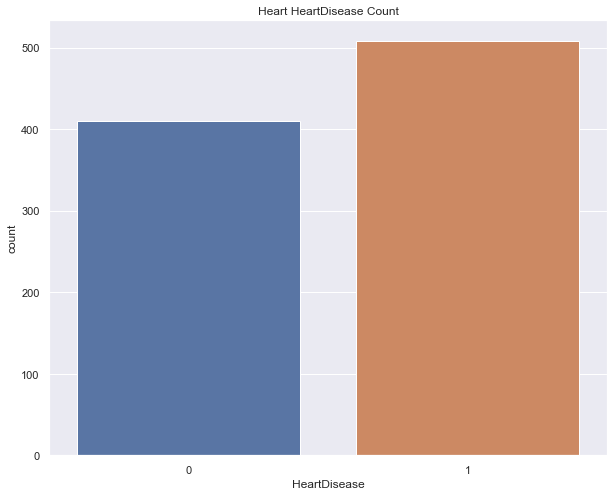

In [109]:
#Histograma del atributo clase
ax=plt.subplots(1,1,figsize=(10,8))
#sns.countplot('Species',data=iris)
sns.countplot(x='HeartDisease',data=heart)
plt.title("Heart HeartDisease Count")
plt.show()

Convirtiendo Variables Categoricas A Numericas 
Sex , ChestPainType , RestingECG , ExerciseAngina , ST_Slope . 
Teniendo en cuenta El orden Factorize , No orden onehotEncoding.

In [110]:

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['Sex'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['Sex'] = targets_trans.toarray()
#no orden

heartclass = heart['ChestPainType']
heartclass_econded, heartclass_categories = heartclass.factorize()
heart['ChestPainType'] = heartclass_econded
#orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['RestingECG'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['RestingECG'] = targets_trans.toarray()
#no orden

labelEnc = preprocessing.LabelEncoder()
new_target = labelEnc.fit_transform(heart['ExerciseAngina'])
onehotEnc = preprocessing.OneHotEncoder()
onehotEnc.fit(new_target.reshape(-1, 1))
targets_trans = onehotEnc.transform(new_target.reshape(-1, 1))
heart['ExerciseAngina'] = targets_trans.toarray()
#no orden

heartclass = heart['ST_Slope']
heartclass_econded, heartclass_categories = heartclass.factorize()
heart['ST_Slope'] = heartclass_econded
print(heart.info())
#orden

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    float64
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    float64
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    float64
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 86.2 KB
None


Visualizando los histogramas de cada atributo.

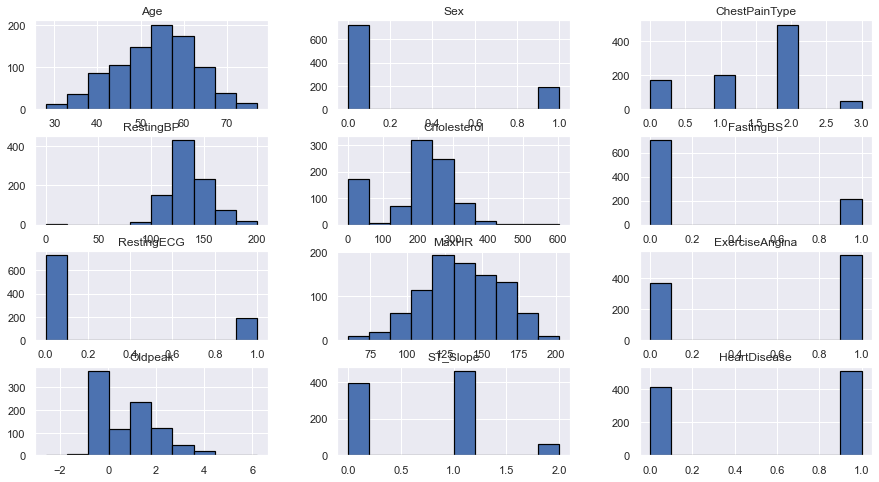

In [111]:
#Histograma de atributos predictores

heart.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
#fig.set_size_inches(12,12)
plt.show()

Diagrama de cajas de los atributos o variables independientes.

   Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40  0.0              0        140          289          0         0.0   
1   49  1.0              1        160          180          0         0.0   
2   37  0.0              0        130          283          0         0.0   
3   48  1.0              2        138          214          0         0.0   
4   54  0.0              1        150          195          0         0.0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172             1.0      0.0         0             0  
1    156             1.0      1.0         1             1  
2     98             1.0      0.0         0             0  
3    108             0.0      1.5         1             1  
4    122             1.0      0.0         0             0  


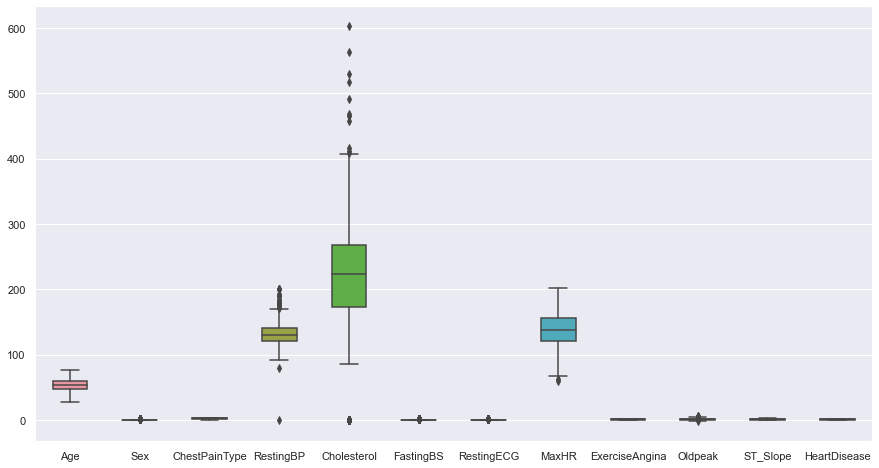

In [112]:
#boxplot de las variables numericas
box_data = heart #variable representing the data array
print(box_data.head())
box_target = heart.HeartDisease #variable representing the labels array
sns.boxplot(data = box_data,width=0.5,fliersize=5)
#sns.set(rc={'figure.figsize':(2,15)})
plt.show()

Observando la correlación entre variables permite descubrir posibles dependencias entre las variables independientes.

                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000 -0.055750       0.214164   0.254399    -0.095282   
Sex            -0.055750  1.000000      -0.179766  -0.005133     0.200092   
ChestPainType   0.214164 -0.179766       1.000000   0.075332    -0.130997   
RestingBP       0.254399 -0.005133       0.075332   1.000000     0.100893   
Cholesterol    -0.095282  0.200092      -0.130997   0.100893     1.000000   
FastingBS       0.198039 -0.120076       0.155111   0.070193    -0.260974   
RestingECG      0.145727  0.049518       0.082470   0.053166     0.177077   
MaxHR          -0.382045  0.189186      -0.273076  -0.112135     0.235792   
ExerciseAngina -0.215793  0.190664      -0.324049  -0.155101     0.034166   
Oldpeak         0.258612 -0.105734       0.300846   0.164803     0.050148   
ST_Slope        0.268264 -0.150693       0.352364   0.075162    -0.111471   

                FastingBS  RestingECG     MaxHR  ExerciseAngina   Oldpeak  

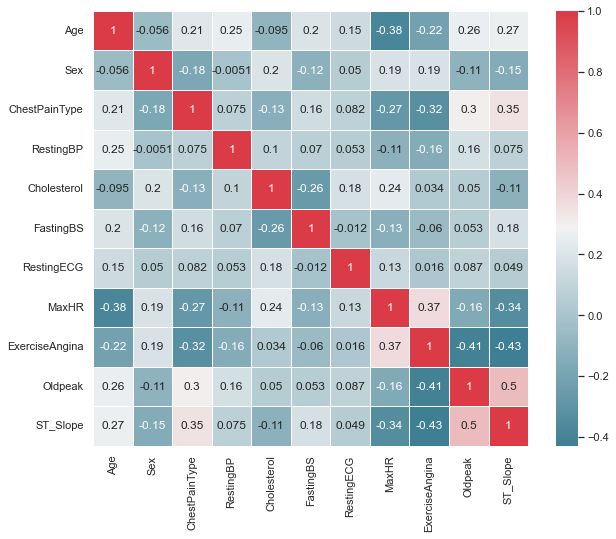

In [113]:
#observando correlacion entre variables
X = heart.iloc[:, 0:11]
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr()
print(corr)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
          cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax, linewidths=.5,annot=True)
plt.show() 

En la matriz de correlación No se observan Variables altamente correlacionadas por lo que se omite una observacion de relacion lineal entre los datos

Una vez observado y analizado las variables del conjunto de datos vamos a hacer una primera prueba preliminar para observar cómo se comportaría el modelo de red neuronal. La configuración de este primer modelo se indica a través de los parámetros de MPLClassifier

In [114]:
#Separando los datos en conjuntos de entrenaimiento y prueba
X = heart.iloc[:, :-1].values
y = heart.iloc[:, 11].values

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Como esta es una primera prueba prelimintar coloco esta instrucción para que nos me saque un warning
#debido a que el modelo no alcanza a converger
warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")

#Entrenando un modelo de red neuronal MLP para clasificación
#MLPClassifier permite configurar las capas ocultas del modelo, la instrucción de abajo indica que el modelo tendrá
#dos capas ocultas cada una con 3 neuronas. Algo como esto hidden_layer_sizes = (3,3,2) indicarían tres capas ocultas con
#3,3 y 2 neuronas respectivamente
model =  MLPClassifier(hidden_layer_sizes = (2,2), alpha=0.01, max_iter=1000) 
model.fit(X_train, y_train) #Training the model

MLPClassifier(alpha=0.01, hidden_layer_sizes=(2, 2), max_iter=1000)

Una vez entrenado el modelo, debemos evaluarlo sobre el conjunto de datos reservado para prueba, y utilizar algunas métricas para observar que tan bien quedo entrenado el modelo. En esta primera prueba utilizamos como métricas el porcentaje de precisión del modelo y la matriz de confusión.

In [115]:
#Test the model
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.5271739130434783
Confusion matrix:
[[ 1 87]
 [ 0 96]]


Graficando

Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:
0.125


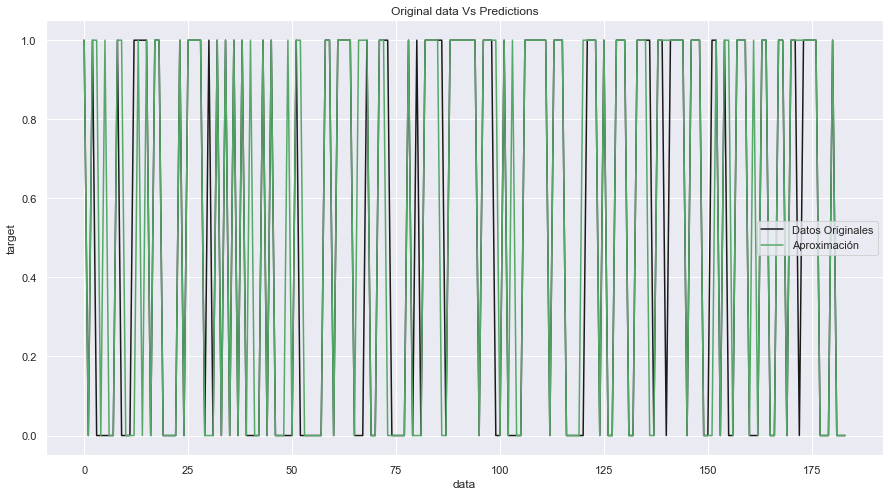

In [137]:
#R_ind = predictions.best_estimator_  #
#new_predictions_R = R_ind.predict(X_test) #Utilizamos los parámetros encontrados para volver 
print('Error cuadrático medio obtenido con los parámetros encontrados por mlp:')
print(mean_squared_error(y_test, predictions))


X = np.arange(0, len(y_test))
plt.figure(figsize=(15,8))
plt.plot(X, y_test, 'k', label='Datos Originales')
plt.plot(X, predictions, 'g', label='Aproximación')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()

Ahora vamos a ajustar los parámetros del modelo utilizando GridSearch

In [116]:
param_grid = [{'hidden_layer_sizes' : [(3,3), (4,4), (5,4)], 'max_iter':[100, 500, 1000]}, 
              {'alpha': [0.0001, 0.001, 0.01, 0.1]}]

In [117]:
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4)],
                          'max_iter': [100, 500, 1000]},
                         {'alpha': [0.0001, 0.001, 0.01, 0.1]}],
             scoring='accuracy')

In [118]:
print(grid_search.best_params_)

{'hidden_layer_sizes': (5, 4), 'max_iter': 1000}


In [119]:
print(grid_search.best_estimator_)

MLPClassifier(hidden_layer_sizes=(5, 4), max_iter=1000)


In [120]:
predictions = grid_search.predict(X_test)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.8804347826086957
Confusion matrix:
[[76 12]
 [10 86]]


Graficando

Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:
0.11956521739130435


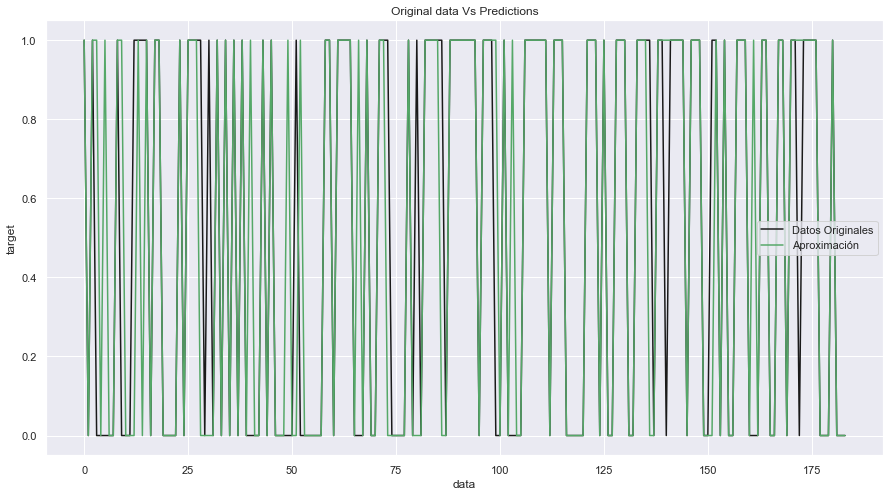

In [121]:
R_ind = grid_search.best_estimator_  #
new_predictions_R = R_ind.predict(X_test) #Utilizamos los parámetros encontrados para volver 
print('Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:')
print(mean_squared_error(y_test, new_predictions_R))


X = np.arange(0, len(y_test))
plt.figure(figsize=(15,8))
plt.plot(X, y_test, 'k', label='Datos Originales')
plt.plot(X, new_predictions_R, 'g', label='Aproximación')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()

Ahora vamos a ajustar los parámetros del modelo utilizando GridSearch PRUEBA 2

In [122]:
param_grid = [{'hidden_layer_sizes' : [(3,3), (4,4), (5,4), (8,7)], 'max_iter':[100, 500, 800, 1000]}, 
              {'alpha': [0.015, 0.01, 0.1, 0.15]}]

In [123]:
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [(3, 3), (4, 4), (5, 4),
                                                 (8, 7)],
                          'max_iter': [100, 500, 800, 1000]},
                         {'alpha': [0.015, 0.01, 0.1, 0.15]}],
             scoring='accuracy')

model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

In [124]:
print(grid_search.best_params_)

{'hidden_layer_sizes': (5, 4), 'max_iter': 500}


In [125]:
predictions = grid_search.predict(X_test)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.8641304347826086
Confusion matrix:
[[74 14]
 [11 85]]


Graficando

Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:
0.1358695652173913


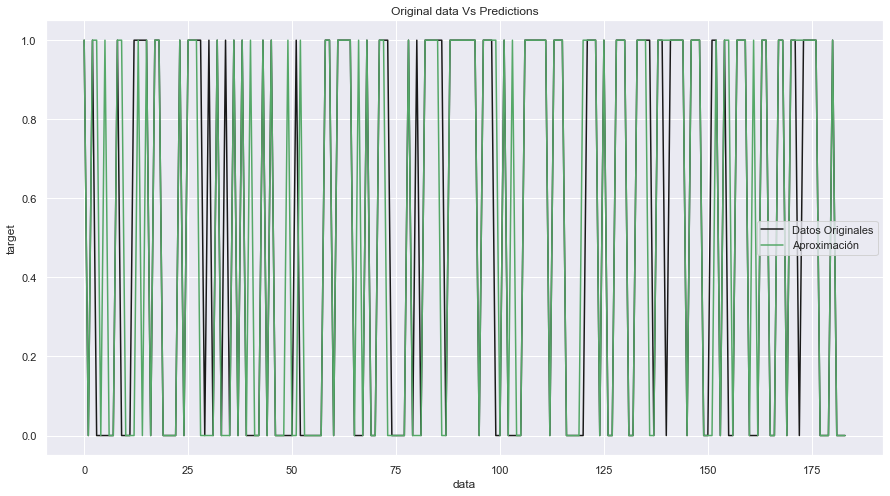

In [126]:
R_ind = grid_search.best_estimator_  #
new_predictions_R = R_ind.predict(X_test) #Utilizamos los parámetros encontrados para volver 
print('Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:')
print(mean_squared_error(y_test, new_predictions_R))


X = np.arange(0, len(y_test))
plt.figure(figsize=(15,8))
plt.plot(X, y_test, 'k', label='Datos Originales')
plt.plot(X, new_predictions_R, 'g', label='Aproximación')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()

Ahora vamos a ajustar los parámetros del modelo utilizando GridSearch PRUEBA 3

In [128]:
param_grid = [{'hidden_layer_sizes' : [ (3,4), (5,4), (5,5), (6,6) , (6,5)], 'max_iter':[ 500,600,800,1000]}, 
              {'alpha': [0.02, 0.01, 0.1, 0.2]}]

In [129]:
model = MLPClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid=[{'hidden_layer_sizes': [(3, 4), (5, 4), (5, 5), (6, 6),
                                                 (6, 5)],
                          'max_iter': [500, 600, 800, 1000]},
                         {'alpha': [0.02, 0.01, 0.1, 0.2]}],
             scoring='accuracy')

In [130]:
print(grid_search.best_params_)

{'hidden_layer_sizes': (3, 4), 'max_iter': 800}


In [131]:
predictions = grid_search.predict(X_test)
print(accuracy_score(y_test, predictions))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predictions))

0.875
Confusion matrix:
[[73 15]
 [ 8 88]]


Graficando

Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:
0.125


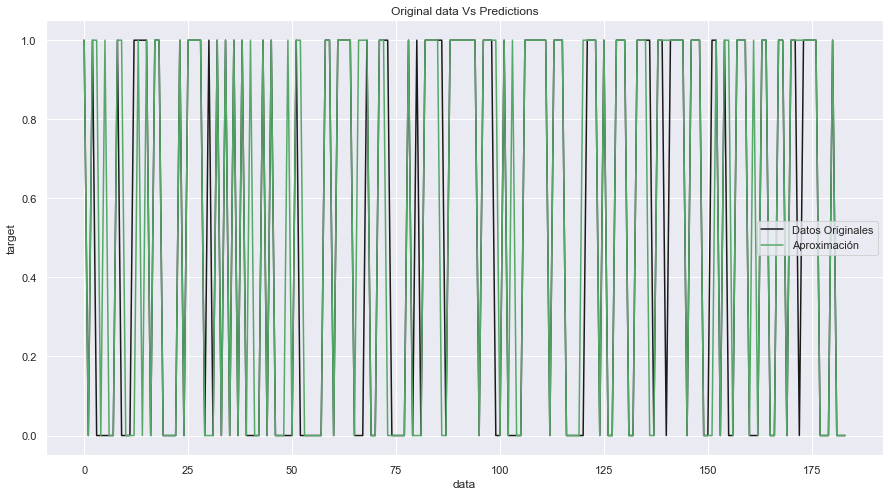

In [132]:
R_ind = grid_search.best_estimator_  #
new_predictions_R = R_ind.predict(X_test) #Utilizamos los parámetros encontrados para volver 
print('Error cuadrático medio obtenido con los parámetros encontrados por GridSearchCV:')
print(mean_squared_error(y_test, new_predictions_R))


X = np.arange(0, len(y_test))
plt.figure(figsize=(15,8))
plt.plot(X, y_test, 'k', label='Datos Originales')
plt.plot(X, new_predictions_R, 'g', label='Aproximación')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Original data Vs Predictions')
plt.legend()
plt.show()